# Лабораторная работа № 2
## студента ПК-16М-1
## Бекленищева Владислава


### Постановка задачи

Условие задачи (Колесников - с. 82)

Начальная система:

$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = u
  \end{cases} $$
где $|u| \le u_{max} $

Управление будем находить из функционального соотношения вида:
$$T\cdot\dot\psi(t) + \psi = 0$$
где скорость сходимости $$T = \frac{c}{m} $$

Варианты выбора $\psi$:

1) Бифуркация типа седло-узел (разрушение или удаление двух особых точек):
$$ \dot x_{2\psi_1}(t) = \mu \pm x^2_{1\psi_1}$$
2) Транскритическая бифуркация (обмен устойчивостью):
$$ \dot x_{2\psi_2}(t) =  \mu \cdot x_1(t) \pm x^2_{1\psi_2}$$
3) Бифуркация типа "Вилка" (надкритическая, подкритическая):
$$ \dot x_{2\psi_3}(t) = \mu \cdot x_1(t) - x^3_{1\psi_3}$$
$$ \dot x_{2\psi_3}(t) = \mu \cdot x_1(t) + x^3_{1\psi_3}$$

Где $x_{1\psi_1}$ - параметр порядка, $\mu$ - расстояние до точки биффуркации.

Задание: 
1. Найти управление u, подставить его в исходную систему и получить замкнутую управлением систему. 
2. Решить ДУ при заданных начальных условиях
3. Построить интегральные кривые для заданных начальных условий.

### Решение задачи

Подключаем пакеты:

In [5]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

##### Решения для бифуркаций типа седло-узел

*Вариант 1* 
$$ \dot x_{2\psi_1}(t) = \mu + x^2_{1\psi_1}$$

Задаем инвариантное многообразие для бифуркации типа седло-узел:
$$ \psi_1 = x_2 - \mu - x_1^2 $$

In [2]:
def psi1(X, sign):
    result = np.array([])
    for x in X:
        x1, x2 = x
        if sign == '+':
            y = x2 - mu11 - x1**2;
        else:
            y = x2 - mu12 + x1**2
        result = np.append(result, y)
    return result

Находим u из функционального соотношения и подставляем в систему:$$ u = 2 x_1 x_2 - \frac{(x_2 - \mu - x_1^2)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = 2 x_1 x_2 - \frac{(x_2 - \mu - x_1^2)}{T}
  \end{cases} $$
Задаем замкнутую систему в виде функции:

In [3]:
def closedSystemForSaddleNodeBifurcationPlus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, 2*x1*x2 - (x2 - mu - x1**2)/T]
    return dxdt

Задаем параметр $T$ для первого случая следующим образом:
1. Решаем задачу Коши для полученной замкнутой системы (через odeint).
2. Строим график с полученными решениями (2 кривые) + график функции $\psi$ для соответствующих решений.
3. Ориентируясь по графику, ищем пересечение $\psi$ с осью Ох. Отмечаем точку как $T$.
4. Записываем новое и окончательное значение как $T = (4\div5)T$

Стоит отметить, что $T$ должно находится в пределах $0 \le t \le T$, где t - верхняя граница интервала времени. Чем больше t, тем на графике траектория будет всё ближе к 0.

In [4]:
t11 = np.arange(0, 10.4, 0.01)

In [5]:
# для (x1,x2) = (-1.1, -1.1)
#0.0267 -> T11 = 0.021360000000000004 - very fast (+ t=15)
#0.122915 -> 0.098332 (bad)
#0.505437 -> 0.40434960000000003 (too bad)
T11 = (4/5)*0.021360000000000004
T11

0.017088000000000002

Полученная выше замкнутая система переводит ИТ (изобрающую точку) обьекта в окрестность многообразия $\psi = 0$, а вдоль самого многообразия систему ведет к началу координат уравнение:
$$\dot x_{1\psi_1} = \mu + x_{1\psi_1}^2 (*)$$  
Это уравнение получено из уравнения $\psi = 0$ при выражении $x_2$:
$$x_2 = \mu + x_1^2$$
и подстановкой в первое уравнение замкнутой системы. Таким образом, произошло **сжатие фазового пространства**: вместо двух уравнения (N=2) получилось одно (N=1).

Благодаря уравнению $(*)$ мы можем подобрать параметр $\mu$. Для этого нужно построить функцию Ляпунова:
$$V(t) = \frac{1}{2}x_1$$
$$\dot V(t) = x_1 \dot x_1$$
Вообще функция Ляпунова позволяет исследовать $(*)$ на устойчивость. Для асимптотической устойчивости нужно чтобы $\dot V(t) < 0$. Подставим функцию полученные соотношения и получим:
$$x_1 (\mu + x_1^2) < 0$$
Для нашего случая получаем, что $x_1 < 0$, а значит скобка должна быть положительной. Из этого получим, что:
$$x_1 \gt \pm \sqrt{-\mu}$$
Из уравнения следует, что $\mu \le 0$ из свойства квадратного корня. 

Выберем $\mu$ таким:

In [6]:
mu11 = -0.000001

Решаем систему с помощью *odeint*:

In [7]:
sol_bif1_plus = odeint(closedSystemForSaddleNodeBifurcationPlus, [-1.1, -1.1], t11, args=(T11, mu11))
x_bif1_plus = sol_bif1_plus[:, 0]
y_bif1_plus = sol_bif1_plus[:, 1]

Строим 3D график с траекторией, которая должна стремится к 0 по x и y:

<IPython.core.display.Javascript object>


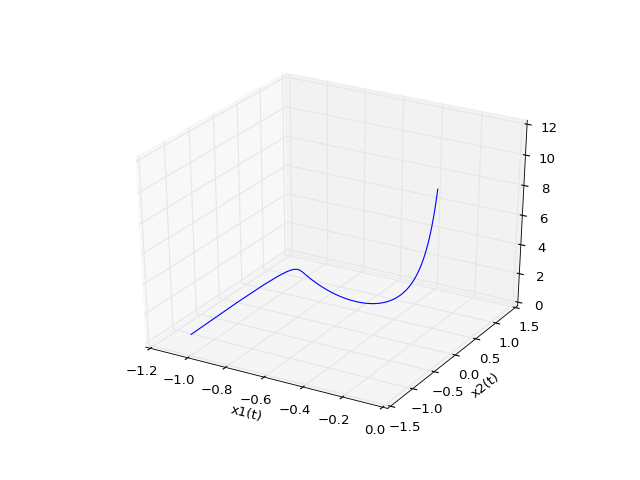

In [8]:
# okey
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif1_plus,y_bif1_plus, t11)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
plt.show()

График для нахождения $T$:

<IPython.core.display.Javascript object>


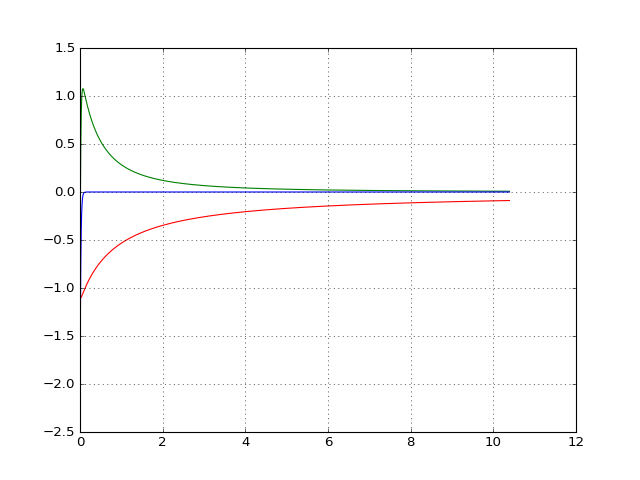

In [9]:
plt.plot(t11, x_bif1_plus, 'r')
plt.plot(t11, y_bif1_plus, 'g')
plt.plot(t11, psi1(sol_bif1_plus,'+'), 'b')
plt.grid()
plt.show()

Далее всё будет описываться аналогично первому варианту.

*Вариант 2* 
$$ \dot x_{2\psi_1}(t) = \mu - x^2_{1\psi_1}$$
$$ \psi_1 = x_2 - \mu + x_1^2 $$
$$ u = -2 x_1 x_2 - \frac{(x_2 - \mu + x_1^2)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = -2 x_1 x_2 - \frac{(x_2 - \mu + x_1^2)}{T}
  \end{cases} $$

In [175]:
def closedSystemForSaddleNodeBifurcationMinus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, -2*x1*x2 - (x2 - mu + x1**2)/T]
    return dxdt

In [196]:
#0.0267 -> T12 = 0.021360000000000004 - very fast (+ t=15)
#0.122915 -> 0.098332 (bad)
#0.505437 -> 0.40434960000000003 (too bad)
T12 = (4/5)*0.08
T12

0.064

In [215]:
sol_bif1_minus = odeint(closedSystemForSaddleNodeBifurcationMinus, [1.1, -1.1], t, args=(T12, mu))
x_bif1_minus = np.transpose(sol_bif1_minus)[0]
y_bif1_minus = np.transpose(sol_bif1_minus)[1]

<IPython.core.display.Javascript object>


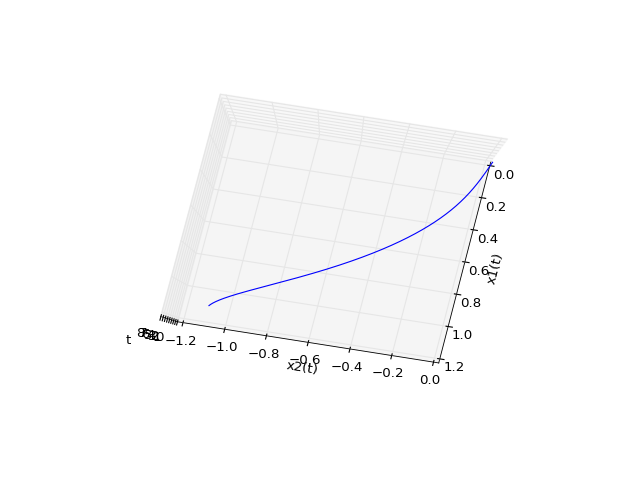

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif1_minus, y_bif1_minus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

<IPython.core.display.Javascript object>


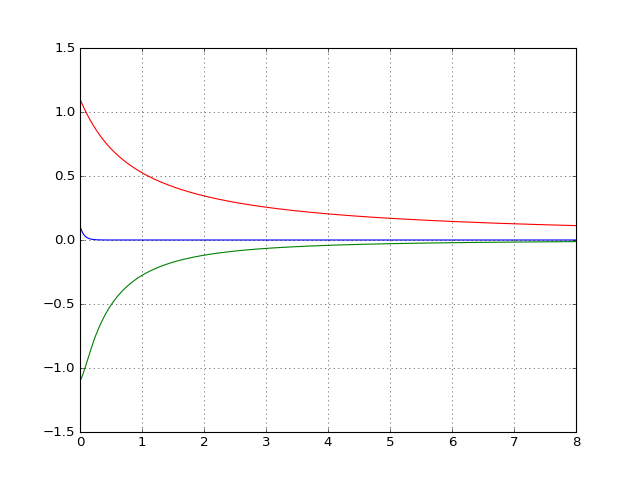

In [219]:
plt.plot(t, sol_bif1_minus[:,0], 'r')
plt.plot(t, sol_bif1_minus[:,1], 'g')
plt.plot(t, psi1(sol_bif1_minus,'-'), 'b')
plt.grid()
plt.show()

##### Решения для бифуркаций типа транскритическая

*Вариант 1* 
$$ \dot x_{2\psi_2}(t) = \mu x_1 + x^2_{1\psi_2}$$

Задаем инвариантное многообразие для бифуркации типа транскритическая:
$$ \psi_2 = x_2 - \mu x_1 - x_1^2 $$

In [13]:
def psi2(X, sign):
    result = np.array([])
    for x in X:
        x1, x2 = x
        if sign == '+':
            y = x2 - mu21*x1 - x1**2
        else:
            y = x2 - mu22*x1 + x1**2
        result = np.append(result, y)
    return result

Находим u из функционального соотношения и подставляем в систему:$$ u = 2 x_1 x_2 - \frac{(x_2 - \mu - x_1^2)}{T}$$
$$ u = (\mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 - x_1^2)}{T}$$

Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = (\mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 - x_1^2)}{T}
  \end{cases} $$
  
Задаем замкнутую систему в виде функции:

In [2]:
def closedSystemForTranscriticalBifurcationPlus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, (mu + 2*x1)*x2 - (x2 - mu*x1 - x1**2)/T]
    return dxdt

In [8]:
t21 = np.arange(0, 10.4, 0.01)

In [3]:
T21 = 4/5*0.051
T21

0.0408

Движение замкнутой системы вдоль многообразия $\psi = 0$ ведет уравнение:
$$\dot x_1 = \mu x_1 +x_1^2$$

Рассмотрим функцию Ляпунова:
$$\dot V = x_1 \dot x_1 = x_1 (\mu x_1 + x_1^2) = x_1^2(\mu+x_1)<0$$
Отсюда следует, что $x1^2>0$, а значит должно быть, что $(\mu+x_1)<0$. Получаем, что $x_1<-\mu$. Учитывая, что мы будем начинать движение из (-1.1) и все координаты $x_1$ будут отрицательными (основываясь на 3D графике), можно предположить, что $x_1 < 0$. А значит окончательно имеем:
$$\mu < 0$$

In [10]:
mu21 = -0.000001

In [16]:
sol_bif2_plus = odeint(closedSystemForTranscriticalBifurcationPlus, [-1.1, -1.1], t21, args=(T21,mu21))
x_bif2_plus = np.transpose(sol_bif2_plus)[0]
y_bif2_plus = np.transpose(sol_bif2_plus)[1]

<IPython.core.display.Javascript object>


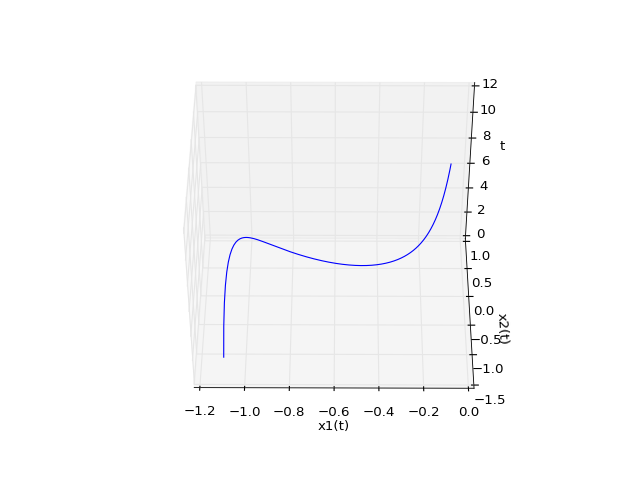

In [17]:
# okey
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif2_plus, y_bif2_plus, t21)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

<IPython.core.display.Javascript object>


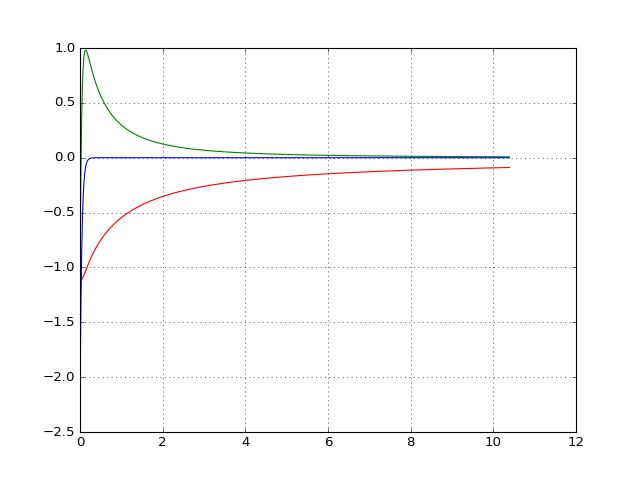

In [18]:
plt.plot(t21, sol_bif2_plus[:,0], 'r')
plt.plot(t21, sol_bif2_plus[:,1], 'g')
plt.plot(t21, psi2(sol_bif2_plus,'+'), 'b')
plt.grid()
plt.show()

*Вариант 2* 
$$ \dot x_{2\psi_2}(t) = \mu x_1 - x^2_{1\psi_2}$$
$$ \psi_2 = x_2 - \mu x_1 + x_1^2 $$
$$ u = - (- \mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 + x_1^2)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = - (- \mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 + x_1^2)}{T}
  \end{cases} $$

In [ ]:
def closedSystemForTranscriticalBifurcationMinus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, -(-mu + 2*x1)*x2 - (x2 - mu*x1 + x1**2)/T]
    return dxdt

In [ ]:
T22 = 4/5*0.051
T22

In [ ]:
sol_bif2_minus = odeint(closedSystemForTranscriticalBifurcationMinus, [5.1, 5.1], t, args=(T22,mu))
x_bif2_minus = np.transpose(sol_bif2_minus)[0]
y_bif2_minus = np.transpose(sol_bif2_minus)[1]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif2_minus, y_bif2_minus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

In [ ]:
plt.plot(t, sol_bif2_minus[:,0], 'r')
plt.plot(t, sol_bif2_minus[:,1], 'g')
plt.plot(t, psi2(sol_bif2_minus,'-'), 'b')
plt.grid()
plt.show()

##### Решения для бифуркаций типа "Вилка"

*Вариант 1* 
$$ \dot x_{2\psi_3}(t) = \mu x_1 + x^3_{1\psi_3}$$
$$ \psi_3 = x_2 - \mu x_1 - x_1^3 $$

In [20]:
def psi3(X, sign):
    result = np.array([])
    for x in X:
        x1, x2 = x
        if sign == '+':
            y = x2 - mu31*x1 - x1**3
        else:
            y = x2 - mu32*x1 + x1**3
        result = np.append(result, y)
    return result

$$ u = (\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 - x_1^3)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = (\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 - x_1^3)}{T}
  \end{cases} $$

In [21]:
def closedSystemForPitchforkBifurcationPlus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, (mu + 3*x1**2)*x2 - (x2 - mu*x1 - x1**3)/T]
    return dxdt

In [22]:
t31 = np.arange(0, 10.4, 0.01)

In [23]:
T31 = 4/5*0.051
T31

0.0408

Движение замкнутой системы вдоль многообразия $\psi = 0$ ведет уравнение:
$$\dot x_1 = \mu x_1 +x_1^3$$

Рассмотрим функцию Ляпунова:
$$\dot V = x_1 \dot x_1 = x_1 (\mu x_1 + x_1^3) = x_1^2(\mu+x_1^2)<0$$
Отсюда следует, что $x1^2>0$, а значит должно быть, что $(\mu+x_1^2)<0$.


In [64]:
mu31 = 231.1

In [73]:
sol_bif3_plus = odeint(closedSystemForPitchforkBifurcationPlus, [120.1, 16.1], t31, args=(T31,mu31))
x_bif3_plus = np.transpose(sol_bif3_plus)[0]
y_bif3_plus = np.transpose(sol_bif3_plus)[1]

C:\Users\vbekl_000\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<IPython.core.display.Javascript object>


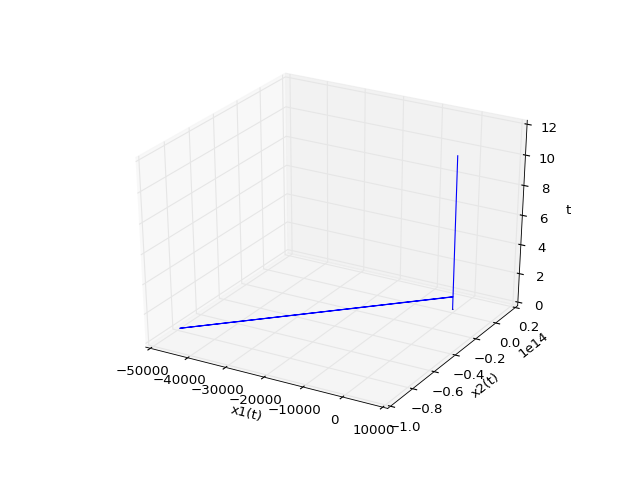

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif3_plus, y_bif3_plus, t31)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

In [ ]:
plt.plot(t, sol_bif3_plus[:,0], 'r')
plt.plot(t, sol_bif3_plus[:,1], 'g')
plt.plot(t, psi3(sol_bif3_plus,'+'), 'b')
plt.grid()
plt.show()

*Вариант 2* 
$$ \dot x_{2\psi_3}(t) = \mu x_1 - x^3_{1\psi_3}$$
$$ \psi_3 = x_2 - \mu x_1 + x_1^3 $$

$$ u = -(-\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 + x_1^3)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = -(-\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 + x_1^3)}{T}
  \end{cases} $$

In [74]:
def closedSystemForPitchforkBifurcationMinus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, -(-mu + 3*x1**2)*x2 - (x2 - mu*x1 + x1**3)/T]
    return dxdt

In [75]:
t32 = np.arange(0, 10.4, 0.01)

In [76]:
T32 = 4/5*0.051
T32

0.0408

Движение замкнутой системы вдоль многообразия $\psi = 0$ ведет уравнение:
$$\dot x_1 = \mu x_1 -x_1^3$$

Рассмотрим функцию Ляпунова:
$$\dot V = x_1 \dot x_1 = x_1 (\mu x_1 - x_1^3) = x_1^2(\mu-x_1^2)<0$$
Отсюда следует, что $x1^2>0$, а значит должно быть, что $(\mu-x_1^2)<0$. Получаем, что $\mu < x_1^2$. А значит:
$$x_1> \pm \sqrt{\mu}$$
Отсюда $\mu > 0$, но и не должно превосходить или равняться $x_1$.

In [100]:
mu32 = 0.0000001

In [101]:
sol_bif3_minus = odeint(closedSystemForPitchforkBifurcationMinus, [5.1, 5.1], t32, args=(T32,mu32))
x_bif3_minus = np.transpose(sol_bif3_minus)[0]
y_bif3_minus = np.transpose(sol_bif3_minus)[1]

<IPython.core.display.Javascript object>


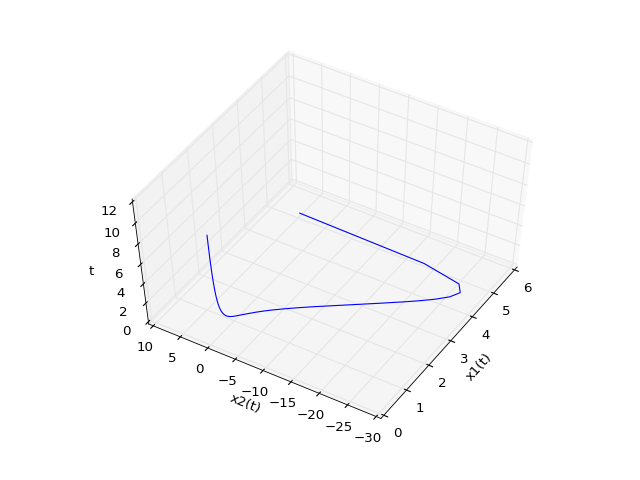

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif3_minus, y_bif3_minus, t32)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

<IPython.core.display.Javascript object>


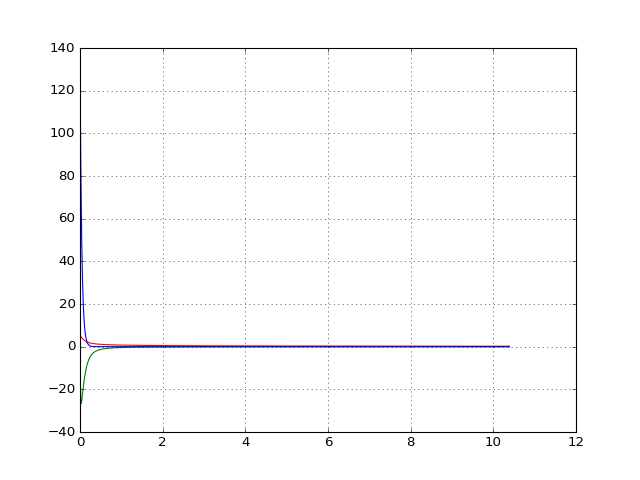

In [103]:
plt.plot(t32, sol_bif3_minus[:,0], 'r')
plt.plot(t32, sol_bif3_minus[:,1], 'g')
plt.plot(t32, psi3(sol_bif3_minus,'-'), 'b')
plt.grid()
plt.show()